IMPORT PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('air_passengers.csv')
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data['ds']=pd.to_datetime(data['ds'],format='%Y-%M')

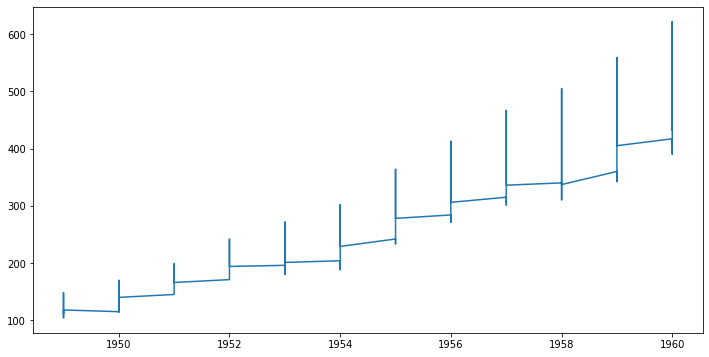

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

FIT THE MODEL

In [5]:
from fbprophet.forecaster import Prophet

In [6]:
model=Prophet()

In [7]:
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


MAKING FUTURE PREDICTIONS

In [8]:
future_prediction=model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()
forecast=model.predict(future_prediction)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01 00:01:00,110.664592,49.446377,164.760682,110.664592,110.664592,-5.895749,-5.895749,-5.895749,-0.894397,-0.894397,-0.894397,8.411880,8.411880,8.411880,-13.413232,-13.413232,-13.413232,0.0,0.0,0.0,104.768843
1,1949-01-01 00:02:00,110.664649,49.528459,161.424833,110.664649,110.664649,-3.913439,-3.913439,-3.913439,1.074563,1.074563,1.074563,8.422094,8.422094,8.422094,-13.410095,-13.410095,-13.410095,0.0,0.0,0.0,106.751210
2,1949-01-01 00:03:00,110.664706,57.281534,174.126210,110.664706,110.664706,-1.931784,-1.931784,-1.931784,3.042880,3.042880,3.042880,8.432294,8.432294,8.432294,-13.406958,-13.406958,-13.406958,0.0,0.0,0.0,108.732922
3,1949-01-01 00:04:00,110.664762,57.835664,170.956870,110.664762,110.664762,0.048774,0.048774,0.048774,5.010113,5.010113,5.010113,8.442481,8.442481,8.442481,-13.403821,-13.403821,-13.403821,0.0,0.0,0.0,110.713536
4,1949-01-01 00:05:00,110.664819,56.471800,168.679620,110.664819,110.664819,2.027791,2.027791,2.027791,6.975819,6.975819,6.975819,8.452655,8.452655,8.452655,-13.400683,-13.400683,-13.400683,0.0,0.0,0.0,112.692610


In [9]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

                   ds        yhat  yhat_lower  yhat_upper
0 1949-01-01 00:01:00  104.768843   49.446377  164.760682
1 1949-01-01 00:02:00  106.751210   49.528459  161.424833
2 1949-01-01 00:03:00  108.732922   57.281534  174.126210
3 1949-01-01 00:04:00  110.713536   57.835664  170.956870
4 1949-01-01 00:05:00  112.692610   56.471800  168.679620


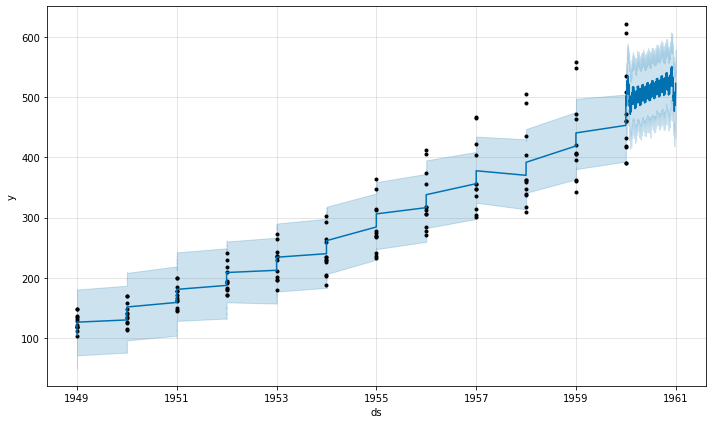

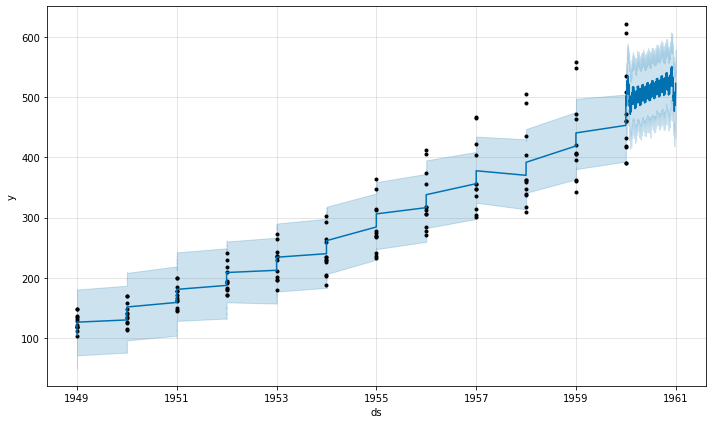

In [10]:
model.plot(forecast)

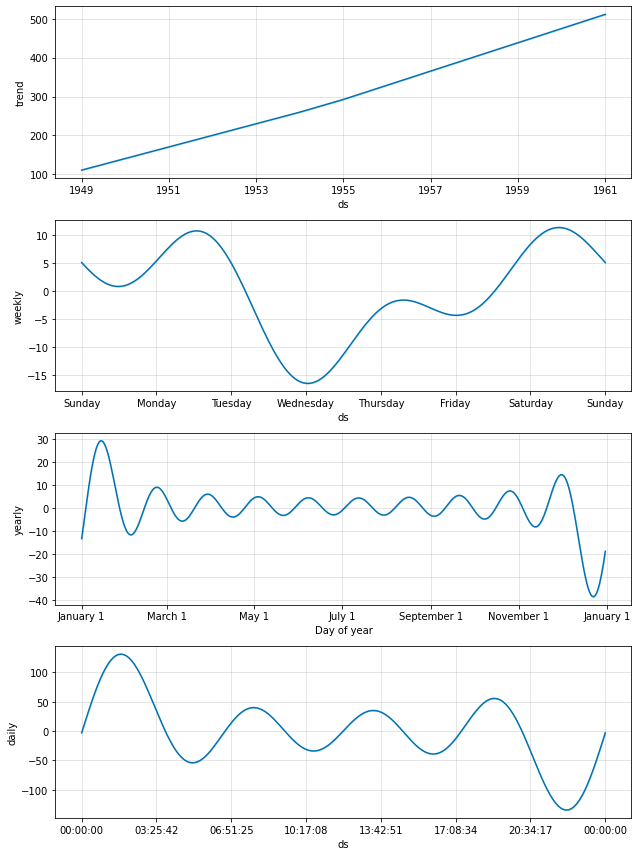

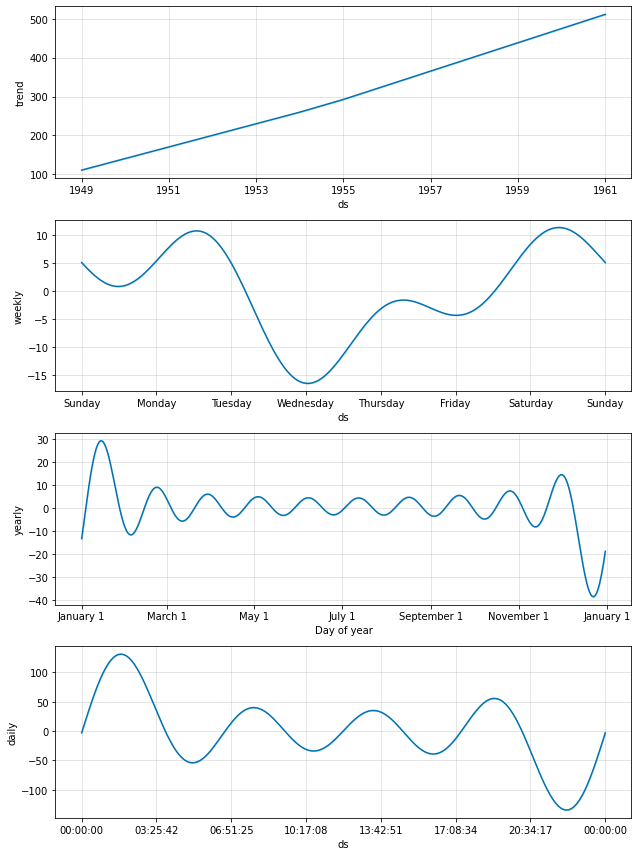

In [11]:
model.plot_components(forecast)

In [12]:
from fbprophet.diagnostics import cross_validation

In [13]:
cv=cross_validation(model,initial='530 days',period='180 days',horizon='365 days')
cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 1950-08-16 00:12:00 and 1959-01-01 00:12:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-01-01 00:01:00,880.978192,865.784333,896.355097,145,1950-08-16 00:12:00
1,1951-01-01 00:02:00,887.592626,872.428431,902.570106,150,1950-08-16 00:12:00
2,1951-01-01 00:03:00,893.020723,877.932813,908.832846,178,1950-08-16 00:12:00
3,1951-01-01 00:04:00,897.261043,881.870422,912.486695,163,1950-08-16 00:12:00
4,1951-01-01 00:05:00,900.312471,883.235133,916.118204,172,1950-08-16 00:12:00
...,...,...,...,...,...,...
211,1960-01-01 00:08:00,427.537149,377.818051,479.144304,606,1959-01-01 00:12:00
212,1960-01-01 00:09:00,429.596640,379.971675,480.873127,508,1959-01-01 00:12:00
213,1960-01-01 00:10:00,431.651002,381.366975,481.617005,461,1959-01-01 00:12:00
214,1960-01-01 00:11:00,433.699776,379.031694,488.954076,390,1959-01-01 00:12:00


EVALUATION OF THE MODEL

In [14]:
from fbprophet.diagnostics import performance_metrics

In [15]:
pm=performance_metrics(cv)
pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,142 days 23:57:00,701201.596765,837.377810,828.710770,4.560434,4.504669,0.000000
1,142 days 23:58:00,721383.526497,849.342997,840.454221,4.563708,4.504669,0.000000
2,142 days 23:59:00,742781.276421,861.847595,852.792303,4.605491,4.504669,0.000000
3,143 days 00:00:00,763066.502429,873.536778,864.844356,4.651839,4.541479,0.000000
4,148 days 23:49:00,774915.550335,880.292878,872.149846,4.652995,4.541479,0.000000
...,...,...,...,...,...,...,...
191,364 days 23:56:00,7312.626910,85.513899,60.841401,0.122592,0.107346,0.523810
192,364 days 23:57:00,7399.301718,86.019194,61.442547,0.120647,0.107346,0.523810
193,364 days 23:58:00,7394.892526,85.993561,61.369348,0.119593,0.107346,0.523810
194,364 days 23:59:00,7364.395093,85.816054,61.045590,0.117897,0.107346,0.571429
